CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary

import model as model
import utils as utils
from model import Net
from utils import *
from model import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [3]:
# Train data transformations
norm_mean,norm_std = 0.1307,0.3081
train_transforms, test_transforms = get_transforms(norm_mean,norm_std)

CODE BLOCK: 4

In [4]:
train_data,test_data = get_datasets(train_transforms,test_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 128

train_loader, test_loader = get_dataloaders(batch_size, train_data, test_data)


CUDA Available? True


CODE BLOCK: 6

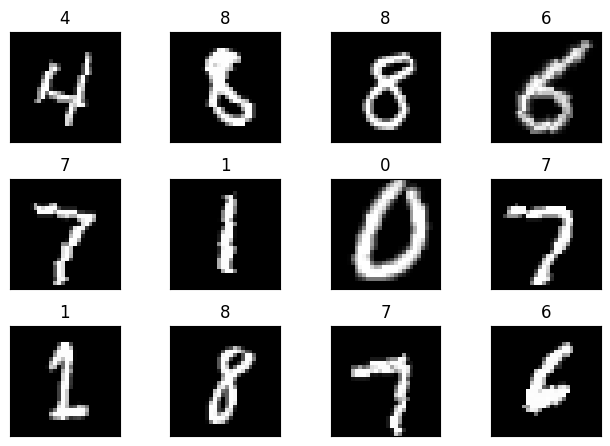

In [6]:
show_sample_images(train_loader)


CODE BLOCK: 7

CODE BLOCK: 8

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [8]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
            Conv2d-3            [-1, 8, 28, 28]             584
       BatchNorm2d-4            [-1, 8, 28, 28]              16
         MaxPool2d-5            [-1, 8, 14, 14]               0
           Dropout-6            [-1, 8, 14, 14]               0
            Conv2d-7           [-1, 16, 14, 14]           1,168
       BatchNorm2d-8           [-1, 16, 14, 14]              32
            Conv2d-9           [-1, 16, 14, 14]           2,320
      BatchNorm2d-10           [-1, 16, 14, 14]              32
        MaxPool2d-11             [-1, 16, 7, 7]               0
          Dropout-12             [-1, 16, 7, 7]               0
           Conv2d-13             [-1, 32, 7, 7]           4,640
      BatchNorm2d-14             [-1, 3

/content/model.py:45: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
  test(model, device, test_loader, criterion, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1392 Batch_id=468 Accuracy=77.82: 100%|██████████| 469/469 [00:34<00:00, 13.70it/s]


Test set: Average loss: 0.0831, Accuracy: 9762/10000 (97.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1619 Batch_id=468 Accuracy=96.28: 100%|██████████| 469/469 [00:25<00:00, 18.43it/s]


Test set: Average loss: 0.0488, Accuracy: 9853/10000 (98.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1054 Batch_id=468 Accuracy=97.22: 100%|██████████| 469/469 [00:28<00:00, 16.24it/s]


Test set: Average loss: 0.0413, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0160 Batch_id=468 Accuracy=97.61: 100%|██████████| 469/469 [00:26<00:00, 17.80it/s]


Test set: Average loss: 0.0316, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0479 Batch_id=468 Accuracy=97.88: 100%|██████████| 469/469 [00:25<00:00, 18.32it/s]


Test set: Average loss: 0.0258, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0774 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:25<00:00, 18.47it/s]


Test set: Average loss: 0.0273, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0824 Batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:25<00:00, 18.47it/s]


Test set: Average loss: 0.0254, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0231 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:25<00:00, 18.62it/s]


Test set: Average loss: 0.0239, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0335 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:25<00:00, 18.61it/s]


Test set: Average loss: 0.0240, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0880 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:25<00:00, 18.11it/s]


Test set: Average loss: 0.0233, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0799 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:25<00:00, 18.71it/s]


Test set: Average loss: 0.0221, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0957 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:25<00:00, 18.58it/s]


Test set: Average loss: 0.0222, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0260 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:25<00:00, 18.63it/s]


Test set: Average loss: 0.0213, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.1180 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:24<00:00, 18.87it/s]


Test set: Average loss: 0.0218, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0541 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:24<00:00, 18.90it/s]


Test set: Average loss: 0.0210, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0576 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:25<00:00, 18.66it/s]


Test set: Average loss: 0.0183, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0104 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:25<00:00, 18.55it/s]


Test set: Average loss: 0.0179, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0855 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:25<00:00, 18.52it/s]


Test set: Average loss: 0.0180, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0161 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:25<00:00, 18.67it/s]


Test set: Average loss: 0.0180, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0341 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:25<00:00, 18.59it/s]


Test set: Average loss: 0.0172, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

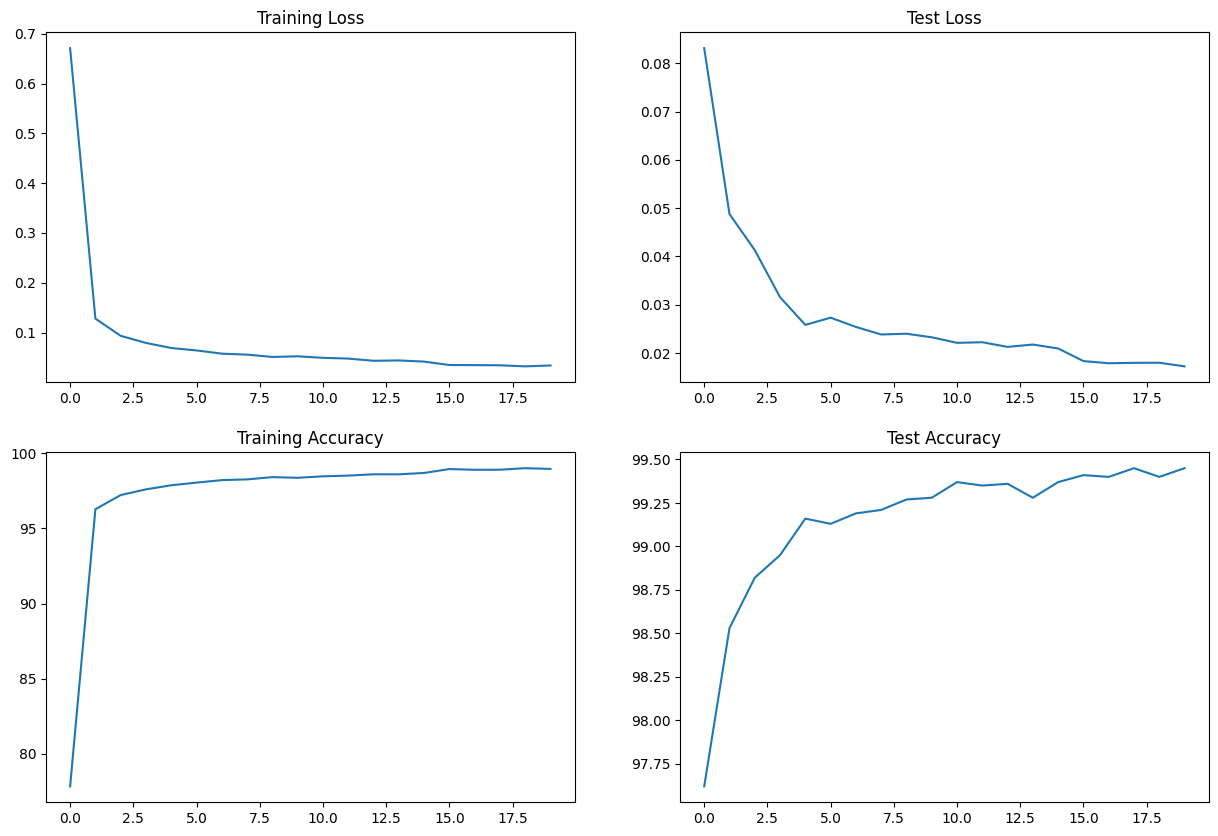

In [10]:
utils.valid_accuracy_loss_plots(train_losses,train_acc,test_losses,test_acc)